<a href="https://colab.research.google.com/github/twishaa05/Identification-of-Constellations-in-Astronomical-Image-Sets/blob/main/SynapseTrial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 88/88 [00:00<00:00, 131.66it/s]


(88, 300, 300, 3)
(88, 88)
(2, 300, 300, 3)
(2, 88)
Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_209 (Conv2D)         (None, 296, 296, 16)      1216      
                                                                 
 batch_normalization_208 (B  (None, 296, 296, 16)      64        
 atchNormalization)                                              
                                                                 
 max_pooling2d_208 (MaxPool  (None, 148, 148, 16)      0         
 ing2D)                                                          
                                                                 
 dropout_310 (Dropout)       (None, 148, 148, 16)      0         
                                                                 
 conv2d_210 (Conv2D)         (None, 144, 144, 32)      12832     
                                                                 
 

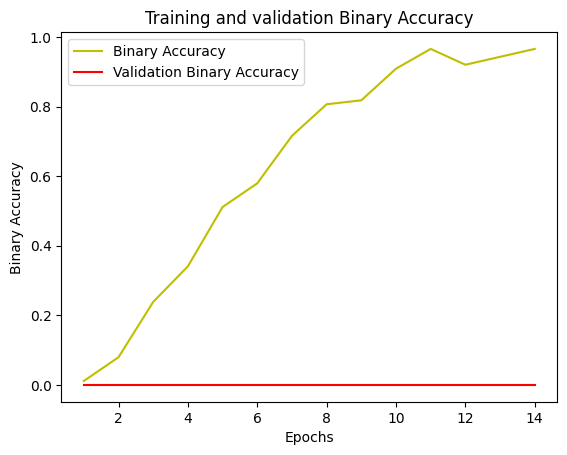

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from keras.layers import BatchNormalization
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

df = pd.read_csv('/content/constellation_type.csv', encoding='cp1252')
test_df = pd.read_csv('/content/Test_CSV.csv', encoding='cp1252')
SIZE=300
X_dataset = []
for i in tqdm(range(df.shape[0])):
  path='/content/'+df['Constellation Image file'][i]
  img = image.load_img(path, target_size=(SIZE,SIZE,3))
  img = image.img_to_array(img)
  img = img/255.
  X_dataset.append(img)

X_testset = []
for i in range(test_df.shape[0]):
  path='/content/'+test_df['Constellation Image file'][i]
  img = image.load_img(path, target_size=(SIZE,SIZE,3))
  img = image.img_to_array(img)
  img = img/255.
  X_testset.append(img)

X = np.array(X_dataset)
print(X.shape)
y = df.drop(['Constellation Image file'], axis=1)
y = y.to_numpy()
print(y.shape)
X_test = np.array(X_testset)
print(X_test.shape)
y_test = test_df.drop(['Constellation Image file'], axis=1)
y_test = y_test.to_numpy()
print(y_test.shape)

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(SIZE,SIZE,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(90, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(88, activation='softmax'))
model.summary()


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X, y,steps_per_epoch=8, epochs=14, validation_data=(X_test, y_test))


loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)
  model.save_weights("m.h5")

1/1 [==============================] - 0s 146ms/step
Capricornus – Sea Goat (0.0581)
Corona Australis – Southern Crown (0.0422)
Centaurus – Centaur (0.0382)
Canis Major – Big Dog (0.0323)
Lacerta – Lizard (0.0322)
Dorado – Fish (0.024)
Serpens – Serpent (0.0224)
Lepus – Hare/Rabbit (0.0221)
Canes Venatici – Hunting Dogs (0.0207)
Hydrus – Watersnake (0.0197)


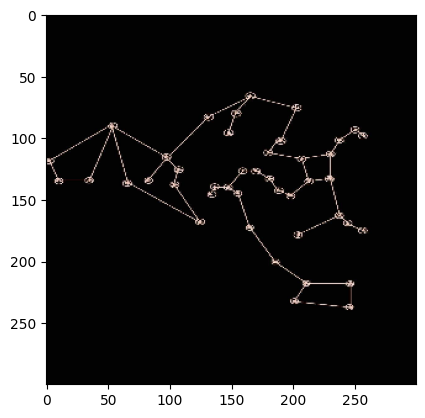

In [ ]:
img = image.load_img('/content/Challenge1.jpg', target_size=(SIZE,SIZE,3))

img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)

classes = np.array(df.columns[2:]) #Get array of all classes
proba = model.predict(img)  #Get probabilities for each class
sorted_categories = np.argsort(proba[0])[:-11:-1]  #Get class names for top 10 categories

#Print classes and corresponding probabilities
for i in range(10):
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))



In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()